# Semi-automated machine learning with molecules

In [2]:
#load modules
from guiml.gui.CSVSelector import CSVSelector
from guiml.gui.DescriptorSelector import DescriptorSelector
from guiml.gui.PlotSelector import PlotSelector
from guiml.gui.ColumnSelector import ColumnSelector
from guiml.gui.DatasetPreparer import DatasetPreparer

from guiml.gui.mol_plot import prepare_images
from guiml.gui.ModelSelector import ModelSelector
from guiml.ml.auto_pipe import prepare_pipeline
from guiml.ml.eval import evaluate_model
from guiml.gui.IDSelector import IDSelector

#jupyter bokeh command
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

# Select csv file

In [3]:
csv_selector=CSVSelector()
csv_selector()


Select(description='Select database file', options=('database/test_db.csv',), value='database/test_db.csv')

Button(description='Reset settings', style=ButtonStyle())

In [9]:
df=csv_selector.load()
df

,id,tags,created_at,updated_at,title,inputter,reference,SMILES,mol_ratio,structure,...,transmittance_400nm,thickness,Tg,Td5,Td10,Tm,Tb,density,memo,file
0,109,2,2022/5/9 5:23,2022/5/9 5:23,109,NaN,NaN,CCCCCCCSSCCCCCCC,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-37.99,NaN,NaN,NaN,NaN
1,108,2,2022/5/9 5:23,2022/5/9 5:23,108,NaN,NaN,CCCC[Sn](CCCC)(CCCC)C=C,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0850,NaN,NaN
2,107,2,2022/5/9 5:23,2022/5/9 5:23,107,NaN,NaN,[H+].[Cl-].CCCCCCCCCCCCCCN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,38.19,291.25,0.8079,NaN,NaN
3,106,2,2022/5/9 5:23,2022/5/9 5:23,106,NaN,NaN,CCCCCCCCCCCCN(C)C,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-20.30,NaN,0.7846,NaN,NaN
4,105,2,2022/5/9 5:23,2022/5/9 5:23,105,NaN,NaN,CCCCCCCCCCN(CC)CC,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7870,NaN,NaN
5,104,2,2022/5/9 5:23,2022/5/9 5:23,104,NaN,NaN,CC(C)N(C(C)C)P(OC(C)(C)C)OC(C)(C)C,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8790,NaN,NaN
6,103,2,2022/5/9 5:23,2022/5/9 5:23,103,NaN,NaN,CCCCNCCCCCCNCCCC,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,101,2,2022/5/9 5:23,2022/5/9 5:23,101,NaN,NaN,CCCCCCCC[Si](OCC)(OCC)OCC,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8800,NaN,NaN
8,100,2,2022/5/9 5:23,2022/5/9 5:23,100,NaN,NaN,CCCCCCCC[SiH](C(C)C)C(C)C,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7890,NaN,NaN
9,99,2,2022/5/9 5:23,2022/5/9 5:23,99,NaN,NaN,C[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O[...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-59.00,NaN,0.8910,NaN,NaN


# Select SMILES column and descriptor algorithms

In [10]:
#show descriptor window
descriptor_selector=DescriptorSelector()
descriptor_selector(df)


Select(description='SMILES', index=7, options=('id', 'tags', 'created_at', 'updated_at', 'title', 'inputter', …

SelectMultiple(description='Select descriptors', index=(0,), options=('RDKit', 'Mordred(2D)', 'Mordred(3D)', '…

In [11]:
desc_df=descriptor_selector.load()
desc_df

100%|██████████| 23/23 [00:00<00:00, 671.52it/s]


,id,tags,created_at,updated_at,title,inputter,reference,SMILES,mol_ratio,structure,...,RDKit_desc_fr_sulfide,RDKit_desc_fr_sulfonamd,RDKit_desc_fr_sulfone,RDKit_desc_fr_term_acetylene,RDKit_desc_fr_tetrazole,RDKit_desc_fr_thiazole,RDKit_desc_fr_thiocyan,RDKit_desc_fr_thiophene,RDKit_desc_fr_unbrch_alkane,RDKit_desc_fr_urea
0,109,2,2022/5/9 5:23,2022/5/9 5:23,109,NaN,NaN,CCCCCCCSSCCCCCCC,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0
1,108,2,2022/5/9 5:23,2022/5/9 5:23,108,NaN,NaN,CCCC[Sn](CCCC)(CCCC)C=C,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,107,2,2022/5/9 5:23,2022/5/9 5:23,107,NaN,NaN,[H+].[Cl-].CCCCCCCCCCCCCCN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0
3,106,2,2022/5/9 5:23,2022/5/9 5:23,106,NaN,NaN,CCCCCCCCCCCCN(C)C,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0
4,105,2,2022/5/9 5:23,2022/5/9 5:23,105,NaN,NaN,CCCCCCCCCCN(CC)CC,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
5,104,2,2022/5/9 5:23,2022/5/9 5:23,104,NaN,NaN,CC(C)N(C(C)C)P(OC(C)(C)C)OC(C)(C)C,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,103,2,2022/5/9 5:23,2022/5/9 5:23,103,NaN,NaN,CCCCNCCCCCCNCCCC,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0
7,101,2,2022/5/9 5:23,2022/5/9 5:23,101,NaN,NaN,CCCCCCCC[Si](OCC)(OCC)OCC,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
8,100,2,2022/5/9 5:23,2022/5/9 5:23,100,NaN,NaN,CCCCCCCC[SiH](C(C)C)C(C)C,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
9,99,2,2022/5/9 5:23,2022/5/9 5:23,99,NaN,NaN,C[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O[...,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
#visualize data
plot_selector=PlotSelector()

Dropdown(description='Plot program', options=('Seaborn', 'Bokeh'), value='Seaborn')

<AxesSubplot:xlabel='RDKit_desc_NumAromaticCarbocycles', ylabel='rafractive_index'>

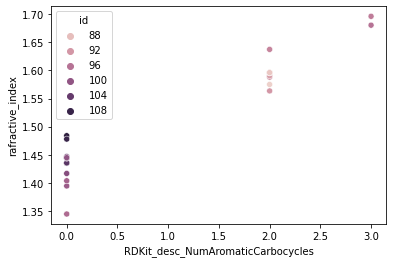

In [35]:

plot_selector(desc_df)

# Machine learning

In [20]:
#select columns
column_selector=ColumnSelector()
column_selector(desc_df)


Select(description='Target', options=('id', 'tags', 'created_at', 'updated_at', 'title', 'inputter', 'referenc…

In [21]:
selected_col_df=column_selector.load()
selected_col_df

,rafractive_index,RDKit_desc_MaxEStateIndex,RDKit_desc_MinEStateIndex,RDKit_desc_MaxAbsEStateIndex,RDKit_desc_MinAbsEStateIndex,RDKit_desc_qed,RDKit_desc_MolWt,RDKit_desc_HeavyAtomMolWt,RDKit_desc_ExactMolWt,RDKit_desc_NumValenceElectrons,...,RDKit_desc_fr_sulfide,RDKit_desc_fr_sulfonamd,RDKit_desc_fr_sulfone,RDKit_desc_fr_term_acetylene,RDKit_desc_fr_tetrazole,RDKit_desc_fr_thiazole,RDKit_desc_fr_thiocyan,RDKit_desc_fr_thiophene,RDKit_desc_fr_unbrch_alkane,RDKit_desc_fr_urea
0,1.4840,2.280897,1.360767,2.280897,1.360767,0.281691,262.528,232.288,262.178893,98.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0
1,1.4780,4.185252,-1.851286,4.185252,1.365833,0.462717,317.105,286.865,318.136946,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.4447,5.448878,0.000000,5.448878,0.000000,0.524470,249.870,217.614,249.222328,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0
3,1.4354,2.282488,1.260417,2.282488,1.260417,0.457738,213.409,182.161,213.245650,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0
4,1.4357,2.524884,1.215278,2.524884,1.215278,0.457738,213.409,182.161,213.245650,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
5,1.4440,6.167106,-1.045782,6.167106,0.195453,0.662708,277.389,245.133,277.217066,110.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.4470,3.489491,1.203446,3.489491,1.203446,0.472544,228.424,196.168,228.256549,98.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0
7,1.4170,5.832591,-2.364018,5.832591,0.682596,0.368576,276.493,244.237,276.212071,110.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
8,1.4450,2.438464,-0.439215,2.438464,0.439215,0.366315,228.496,196.240,228.227328,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
9,1.3948,6.499677,-2.358652,6.499677,1.641117,0.401666,459.001,416.665,458.164784,152.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
#select train and test records
id_selector=IDSelector(selected_col_df)
id_selector.selector()

In [24]:
#prepare dataset
dataset_preparer=DatasetPreparer()
tr_X, te_X, tr_y, te_y,dataset_df=dataset_preparer(selected_col_df,id_selector)
dataset_df

/home/user/anaconda3/envs/mi/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,rafractive_index,RDKit_desc_MaxEStateIndex,RDKit_desc_MinEStateIndex,RDKit_desc_MaxAbsEStateIndex,RDKit_desc_MinAbsEStateIndex,RDKit_desc_qed,RDKit_desc_MolWt,RDKit_desc_HeavyAtomMolWt,RDKit_desc_ExactMolWt,RDKit_desc_NumValenceElectrons,...,RDKit_desc_fr_sulfonamd,RDKit_desc_fr_sulfone,RDKit_desc_fr_term_acetylene,RDKit_desc_fr_tetrazole,RDKit_desc_fr_thiazole,RDKit_desc_fr_thiocyan,RDKit_desc_fr_thiophene,RDKit_desc_fr_unbrch_alkane,RDKit_desc_fr_urea,dataset_category
0,1.4840,2.280897,1.360767,2.280897,1.360767,0.281691,262.528,232.288,262.178893,98.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,train
1,1.4780,4.185252,-1.851286,4.185252,1.365833,0.462717,317.105,286.865,318.136946,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,test
2,1.4447,5.448878,0.000000,5.448878,0.000000,0.524470,249.870,217.614,249.222328,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,train
3,1.4354,2.282488,1.260417,2.282488,1.260417,0.457738,213.409,182.161,213.245650,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,train
4,1.4357,2.524884,1.215278,2.524884,1.215278,0.457738,213.409,182.161,213.245650,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,test
5,1.4440,6.167106,-1.045782,6.167106,0.195453,0.662708,277.389,245.133,277.217066,110.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train
6,1.4470,3.489491,1.203446,3.489491,1.203446,0.472544,228.424,196.168,228.256549,98.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,train
7,1.4170,5.832591,-2.364018,5.832591,0.682596,0.368576,276.493,244.237,276.212071,110.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,test
8,1.4450,2.438464,-0.439215,2.438464,0.439215,0.366315,228.496,196.240,228.227328,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,train
9,1.3948,6.499677,-2.358652,6.499677,1.641117,0.401666,459.001,416.665,458.164784,152.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train


In [25]:
#machine learning models
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,BaggingRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR 
from sklearn.linear_model import Ridge,Lasso,ElasticNet


#you can add your favorite model here
model_list=[
RandomForestRegressor(),
RandomForestRegressor(max_depth=2,),
GradientBoostingRegressor(),
BaggingRegressor(),
LinearRegression(),
KNeighborsRegressor(n_neighbors=5),
SVR(kernel='rbf', C=1e3, gamma=0.1, epsilon=0.1),
Ridge(alpha=0.5),
Lasso(alpha=0.1),
ElasticNet(alpha=0.1),
AdaBoostRegressor(),

]

# show model selector
model_selector=ModelSelector(model_list)
model_selector()

Select(description='Select model', layout=Layout(width='80%'), options=('0: RandomForestRegressor()', '1: Rand…

In [26]:
# fit and predict
model=model_selector.load()

#pipeline: X,y are scaled automatically
pipe=prepare_pipeline(tr_X,model)

#or just directly use model
#pipe=model

pipe.fit(tr_X,tr_y)


#apply predicted values
predicted_df=dataset_df
predicted_df["predicted"]=pipe.predict(dataset_preparer.prepare_X(predicted_df))

#prepare molecular images for plot
show_df=prepare_images(dataset_df,df,descriptor_selector._smiles_col_w.value)

use 1: RandomForestRegressor(max_depth=2)


RDKit WARNING: [15:52:32] WARNING: not removing hydrogen atom without neighbors


In [28]:
#show
plot_selector(show_df)

Dropdown(description='Plot program', index=1, options=('Seaborn', 'Bokeh'), value='Bokeh')

In [29]:
#scores
print("Train: ",evaluate_model(pipe,tr_X,tr_y))
print("Test : ",evaluate_model(pipe,te_X,te_y))

Train:  {'r2': 0.948444316850166, 'MAE': 0.014011386275452977, 'MSE': 0.000424374789258091, 'RMSE': 0.020600358959447552}
Test :  {'r2': 0.9292521773153023, 'MAE': 0.016428228412698375, 'MSE': 0.0003331588482131765, 'RMSE': 0.018252639486199703}


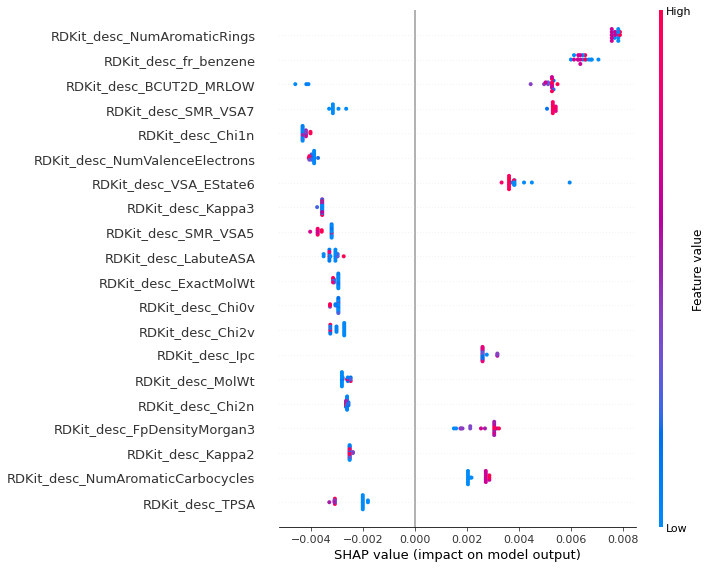

In [30]:
import shap
pipe_model=pipe.get_params()["steps"][-1][-1]

explainer = shap.TreeExplainer(model=pipe_model, )
shap_values = explainer.shap_values(X=tr_X)
shap.summary_plot(shap_values, tr_X)